**Task 3: Classification & Neural Networks**
-

In this task you are required to apply a variety of machine learning algorithms to
the data set nba_rookie_data.csv which can be downloaded from the assignment
task on canvas. This data set contains NBA rookie performance with target variable
Target_5Yrs with 1: if career length >= 5 yrs or 0: if career length <5 yrs.
The classification problem here is to predict if a player will last 5 years in the NBA.
Apply Logistic Regression, Gaussian Naive Bayes and construct Neural Net-
works. After developing the various models you should also analyse the results and
discuss the effectiveness of the models, outlining the improvements when developing
the models and compare the approaches/algorithms used (strengths and weaknesses).
Ideas to consider when completing this task:
- Apply various algorithms to the problem. Caution: Use a small number rather
than many, analyse in depth rather than being superficial and repetitive.
- Is there a way of visualising the model(s)?
- How will you assess the effectiveness of the model(s)?
- Include as many features as you can. Does the model improve?
- Compare the models produced.
- How could you make further improvements?
- What can you conclude about your model?

In [4]:
# Libraries to help reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load the data

url = r"C:\Users\Admin\Desktop\nba_rookie_data.csv"

nba_rookie = pd.read_csv(url)

nba_rookie

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [112]:
# To check the first 10 rows in the data

nba_rookie.head(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [6]:
# To ramdomly check any 10 rows in the dataset

nba_rookie.sample(10, random_state = 0)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
574,Shabazz Muhammad,37,7.8,3.9,1.5,3.4,46.0,0.1,0.3,27.3,...,1.1,65.0,0.6,0.8,1.4,0.2,0.2,0.0,0.4,0
661,Patrick McCaw,26,12.2,2.8,1.1,2.8,38.9,0.6,1.5,37.5,...,0.2,50.0,0.3,0.8,1.0,1.0,0.4,0.3,0.6,0
458,Mark Eaton,81,18.9,4.3,1.8,4.4,41.4,0.0,0.0,0.0,...,1.1,65.6,1.1,4.6,5.7,1.4,0.3,3.4,1.7,1
1023,Zach Randolph,41,5.8,2.8,1.2,2.6,44.9,0.0,0.0,0.0,...,0.7,66.7,0.8,0.9,1.7,0.3,0.2,0.1,0.4,1
958,Jay Williams,75,26.1,9.5,3.6,9.1,39.9,0.9,2.7,32.2,...,2.1,64.0,0.4,2.2,2.6,4.7,1.1,0.2,2.3,0
233,Everette Stephens,35,6.0,1.9,0.7,2.1,31.9,0.1,0.3,20.0,...,0.6,77.3,0.3,0.3,0.7,1.1,0.3,0.1,0.8,0
1323,Anthony Peeler,77,21.5,10.4,3.9,8.2,46.8,0.6,1.5,39.0,...,2.7,78.6,0.8,1.5,2.3,2.2,0.8,0.2,1.6,1
364,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,1
760,Mike Taylor,51,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,...,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4,0
465,Russ Schoene,77,15.9,6.2,2.7,5.6,47.6,0.0,0.1,25.0,...,1.1,73.5,1.2,2.1,3.3,0.8,0.3,0.3,1.1,0


In [113]:
# To check the dimension of the data

nba_rookie.shape

(1340, 21)

- There are 1,340 rows and 21 columns in the data

In [114]:
# To check the data types

nba_rookie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1329 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 non-null   f

**Observations**

- There are 1,340 rows and 21 columns in the data
- There are 18 columns with floats data types (numerical variables)
- There are 2 columns with interger data types (numerical variables)
- There is one (1) column with object data type (categorical variable)
- All the 20 columns have numerical variables
- There is 1 categorical variable in the data
- The data occuppies the memory space of 220KB

In [115]:
# To check the descriptive statistics of the data and transpose the result

nba_rookie.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,1340,1294,Charles Smith,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Games Played,1340.0,NaN,NaN,NaN,60.414179,17.433992,11.0,47.0,63.0,77.0,82.0
Minutes Played,1340.0,NaN,NaN,NaN,17.624627,8.307964,3.1,10.875,16.1,22.9,40.9
Points Per Game,1340.0,NaN,NaN,NaN,6.801493,4.357545,0.7,3.7,5.55,8.8,28.2
Field Goals Made,1340.0,NaN,NaN,NaN,2.629104,1.683555,0.3,1.4,2.1,3.4,10.2
Field Goal Attempts,1340.0,NaN,NaN,NaN,5.885299,3.593488,0.8,3.3,4.8,7.5,19.8
Field Goal Percent,1340.0,NaN,NaN,NaN,44.169403,6.137679,23.8,40.2,44.1,47.9,73.7
3 Point Made,1340.0,NaN,NaN,NaN,0.247612,0.383688,0.0,0.0,0.1,0.4,2.3
3 Point Attempt,1340.0,NaN,NaN,NaN,0.779179,1.061847,0.0,0.0,0.3,1.2,6.5
3 Point Percent,1329.0,NaN,NaN,NaN,19.308126,16.022916,0.0,0.0,22.4,32.5,100.0


**Observations**
- The top "name" in the data is "Charles Smith" and it occurs 9 times
- The maximum "game played" is 82 and the minimum is 11
- The maximum "minutes played" is 40.9 and the least is 3.1
- The maximum "fields goal made" is 10.2 and the least is 0.3
- The median of the "Points Per Game" is 5.55

In [7]:
# To create a copy of the data and save in a new variable name, rookie

rookie = nba_rookie.copy()

In [8]:
# To check the missing values in the data

rookie.isna().sum()

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

- There are 11 missing values under "3 Point Percent" column in the data

In [9]:
# To fill the missing values in the "3 Point Percent" column with the median value

rookie["3 Point Percent"].fillna(value=rookie["3 Point Percent"].median(), inplace =True)

In [10]:
# To confirm the missing values has been filled

rookie.isna().sum()

Name                   0
Games Played           0
Minutes Played         0
Points Per Game        0
Field Goals Made       0
Field Goal Attempts    0
Field Goal Percent     0
3 Point Made           0
3 Point Attempt        0
3 Point Percent        0
Free Throw Made        0
Free Throw Attempts    0
Free Throw Percent     0
Offensive Rebounds     0
Defensive Rebounds     0
Rebounds               0
Assists                0
Steals                 0
Blocks                 0
Turnovers              0
TARGET_5Yrs            0
dtype: int64

- There is no missing values again

In [11]:
# To check for row duplications in the data

rookie.duplicated().sum()

12

- There are 12 duplicated rows in the data

In [13]:
# To drop the 12 duplicated rows in the data and save it in a new variable name; rookie

rookie = rookie.drop_duplicates()

# To confirm the duplicated rows have been dropped

rookie.duplicated().sum()

0

- There is no duplication again in the data

In [14]:
# To check the data dimension after dropping the duplicated rows

rookie.shape

(1328, 21)

- There are 1,328 rows and 21 columns in the data after dropping the duplicated rows

In [15]:
# To drop the name attribute (the only categorical variable in the data)

rookie.drop("Name", axis=1, inplace=True)

In [106]:
# To check the data types after dropping the categorical variable in the column "Name"

rookie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Games Played to TARGET_5Yrs
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Games Played         20 non-null     float64
 1   Minutes Played       20 non-null     float64
 2   Points Per Game      20 non-null     float64
 3   Field Goals Made     20 non-null     float64
 4   Field Goal Attempts  20 non-null     float64
 5   Field Goal Percent   20 non-null     float64
 6   3 Point Made         20 non-null     float64
 7   3 Point Attempt      20 non-null     float64
 8   3 Point Percent      20 non-null     float64
 9   Free Throw Made      20 non-null     float64
 10  Free Throw Attempts  20 non-null     float64
 11  Free Throw Percent   20 non-null     float64
 12  Offensive Rebounds   20 non-null     float64
 13  Defensive Rebounds   20 non-null     float64
 14  Rebounds             20 non-null     float64
 15  Assists              20 non

- All columns now have numerical variables

# Visualisation


##### Univariate plot

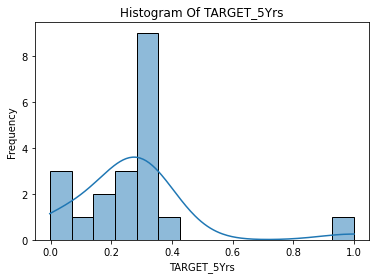

In [113]:
# Histplot of the target variable "TARGET_5Yrs"

sns.histplot(data = rookie, x= "TARGET_5Yrs", kde=True)
plt.title("Histogram Of TARGET_5Yrs")
plt.xlabel("TARGET_5Yrs")
plt.ylabel("Frequency");

### Bivariate plots

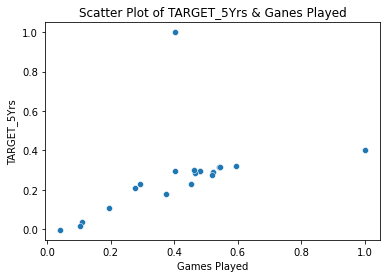

In [110]:
sns.scatterplot(data= rookie, y = "TARGET_5Yrs", x = "Games Played");
plt.title("Scatter Plot of TARGET_5Yrs & Ganes Played")
plt.ylabel("TARGET_5Yrs")
plt.xlabel("Games Played")
plt.show();

**Observation**

- The two variables show positive correlation, as one increases, so the other.
- At games played equals 4, the proportional increase stops. 
- The highest games played is at target_5yrs of 10
- The highest target_5yrs is at games played 10.

#### Correlation plot

In [88]:
# Calling our data, apply correlation method and save it in a new variable; rookie

rookie = rookie.corr()
rookie         

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
Games Played,1.000000,0.593167,0.540905,0.545494,0.520789,0.292795,0.110663,0.102513,0.041510,0.482917,0.480476,0.193224,0.402288,0.467061,0.461037,0.372731,0.453025,0.278056,0.520007,0.403239
Minutes Played,0.593167,1.000000,0.911677,0.902919,0.910359,0.203449,0.392131,0.405821,0.167841,0.791051,0.779740,0.239926,0.571535,0.745238,0.709097,0.630249,0.756882,0.396958,0.826285,0.319873
Points Per Game,0.540905,0.911677,1.000000,0.990832,0.980093,0.254506,0.349710,0.360106,0.153554,0.896445,0.880907,0.258934,0.572909,0.693072,0.675566,0.553965,0.675228,0.384142,0.850336,0.316692
Field Goals Made,0.545494,0.902919,0.990832,1.000000,0.980261,0.291199,0.291823,0.302116,0.121943,0.848194,0.840668,0.223543,0.594507,0.702586,0.690016,0.534201,0.662610,0.395549,0.834326,0.318181
Field Goal Attempts,0.520789,0.910359,0.980093,0.980261,1.000000,0.130166,0.392572,0.415887,0.198550,0.827800,0.806868,0.269749,0.502101,0.640124,0.613646,0.591678,0.690415,0.319744,0.846094,0.292736
Field Goal Percent,0.292795,0.203449,0.254506,0.291199,0.130166,1.000000,-0.291877,-0.347626,-0.324738,0.243288,0.297511,-0.161874,0.510577,0.408537,0.463834,-0.109304,0.056153,0.391380,0.120762,0.230963
3 Point Made,0.110663,0.392131,0.349710,0.291823,0.392572,-0.291877,1.000000,0.982674,0.586594,0.162216,0.099188,0.316549,-0.217944,0.018396,-0.070778,0.377226,0.308139,-0.157545,0.259140,0.037386
3 Point Attempt,0.102513,0.405821,0.360106,0.302116,0.415887,-0.347626,0.982674,1.000000,0.578592,0.177923,0.112859,0.325749,-0.230754,0.013562,-0.078849,0.411242,0.340311,-0.171070,0.284726,0.018770
3 Point Percent,0.041510,0.167841,0.153554,0.121943,0.198550,-0.324738,0.586594,0.578592,1.000000,0.034181,-0.028135,0.323988,-0.286546,-0.119895,-0.188115,0.261986,0.195394,-0.238143,0.109380,-0.003412
Free Throw Made,0.482917,0.791051,0.896445,0.848194,0.827800,0.243288,0.162216,0.177923,0.034181,1.000000,0.980445,0.257335,0.582206,0.652695,0.652551,0.478048,0.600088,0.403833,0.805925,0.298180


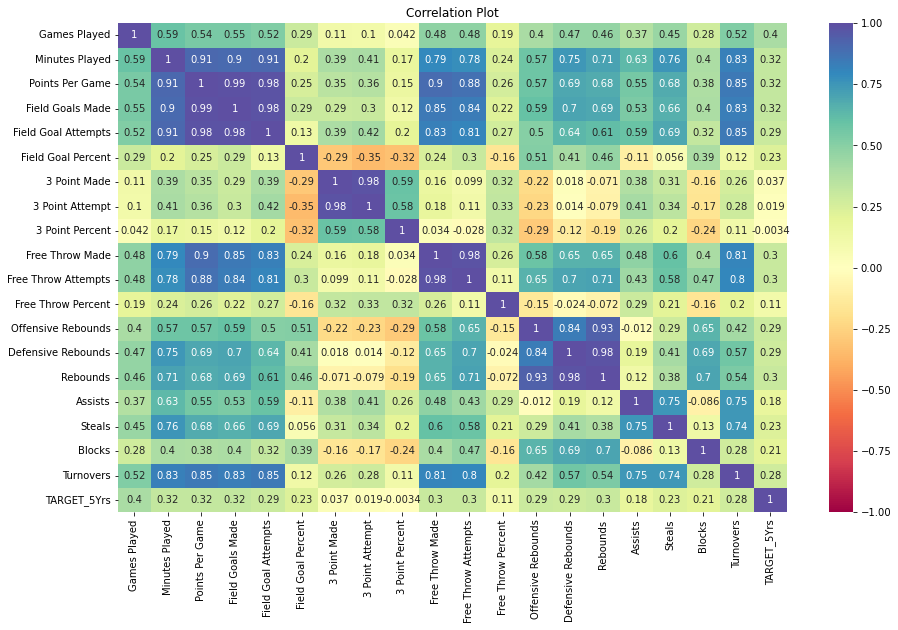

In [90]:
# Heatmap to show relationships between the target and other variables  

plt.figure(figsize=(15,9))
sns.heatmap(data = rookie, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show();

**Observation**

- The target variable "TARGET_5Yrs" shows a positive correlation with all other variables
- The highest positive correlation with the target exists with Games played variable at + 0.4. 

# To build the logistic regression model...

In [20]:
# libraries to help build Logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [22]:
# To split the data into training and testing data, select the target "TARGET_5Yrs" and the independent variables (features)

X = rookie.drop("TARGET_5Yrs", axis = 1)
y = rookie["TARGET_5Yrs"]

In [23]:
# To check the proportion of the target data in percentage

rookie["TARGET_5Yrs"].value_counts(normalize=True)

1    0.620482
0    0.379518
Name: TARGET_5Yrs, dtype: float64

**Interpretation**
- 62% of the NBA players in the target variable (TARGET_5YRS) will last 5 years or more
- 38% of the NBA players in the target varibale will not last 5 years

In [24]:
# To split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0, stratify=y)

**Hint**

The arguments above are explained below
- For inbalance data, the argument "stratify" helps to maintain the same proportion of the target (y) in the training and testing data
- Argument "test_size" is set to 20% (0.2) which means 20% of the data will be used for testing and the remaining 80% to train the model


In [69]:
# To check the unique counts in the target training data

y_train.value_counts()

1    659
0    403
Name: TARGET_5Yrs, dtype: int64

**From above**

- 659 NBA players in the y_train will last 5 years or more
- 403 NBA players will not last 5 years

In [70]:
# To check the unique counts in the target testing data

y_test.value_counts()

1    165
0    101
Name: TARGET_5Yrs, dtype: int64

**From above**

- 165 NBA players in the y_test will last 5 years or more
- 101 NBA players will not last 5 years

In [27]:
# To normalise and instantiate the scaler

scaler = MinMaxScaler()

# To calculate each variable to have a range between 0 and 1, and convert each varaible to have a range between 0 and 1

x_train_scaler =scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [28]:
# To confirm the transformation

x_test_scaler

array([[0.56338028, 0.08730159, 0.04761905, ..., 0.04      , 0.        ,
        0.04878049],
       [0.49295775, 0.0978836 , 0.08791209, ..., 0.12      , 0.02564103,
        0.14634146],
       [0.5915493 , 0.18518519, 0.04395604, ..., 0.04      , 0.15384615,
        0.12195122],
       ...,
       [0.88732394, 0.44973545, 0.29304029, ..., 0.2       , 0.02564103,
        0.14634146],
       [0.56338028, 0.23280423, 0.15750916, ..., 0.12      , 0.02564103,
        0.19512195],
       [0.97183099, 0.36507937, 0.23809524, ..., 0.24      , 0.20512821,
        0.24390244]])

# Logistic Regression

In [30]:
# Create an instant of the logistics regression

logreg = LogisticRegression()

#To train or build the model

logreg.fit(x_train_scaler, y_train)


LogisticRegression()

In [31]:
# function to compute different metrics to check performance of a classification model

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute accuracy
    recall = recall_score(target, pred)  # to compute recall
    precision = precision_score(target, pred)  # to compute precision
    f1 = f1_score(target, pred)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )

    return df_perf, pred

# To check the training performance for logistic regression


In [32]:
# To check the training performance

df_train, y_pred = model_performance_regression(logreg, x_train_scaler, y_train)

df_train

,Accuracy,Recall,Precision,F1-score
0,0.710923,0.834598,0.735294,0.781805


**Interpretation**

- Precision of 0.735294 means that, from the prediction, the model was able to predict 74% correctly that NBA player will last 5 years or more.
- Recall of 0.834598 means that, from the target data, the model was able to predict 84% correctly that NBA player will last 5 years or more.
- Accuracy of 0.710923 means the model was able to accurately 71% predict that NBA player will last 5 years or more.


# Confusion matrix 

In [34]:
# Metrics from the library to compute the confuson matrix

from sklearn.metrics import confusion_matrix

# To create an instant of confusion matrix

c_matrix = confusion_matrix(y_train, y_pred)

c_matrix

array([[205, 198],
       [109, 550]], dtype=int64)

# Visualising Confusion Matrix Using Heatmap

In [98]:
# To plot a heatmap for the confusion matrix

# define a function for the heatmap

def plot_c_matrix(target, pred):
    c_matrix = confusion_matrix(target, pred)
    plt.figure(figsize= (12,6))
    sns.heatmap(data=c_matrix, annot=True, fmt="g")
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.show();

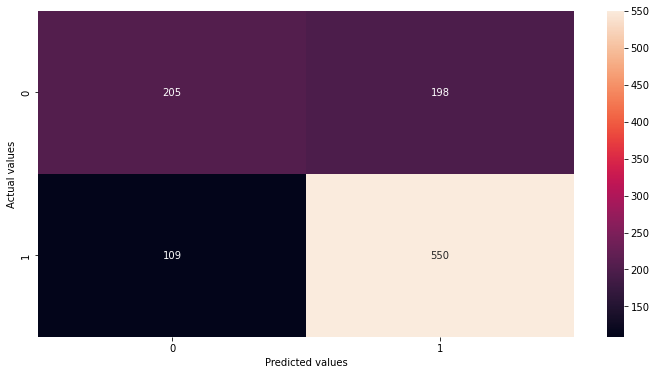

In [99]:
# Call the function to plot heatmap for the confusion matrix for the training data

plot_c_matrix(y_train, y_pred)

**Interpretation**

- From the target training data (y_train, class 1), out of the total 659 NBA players that will last 5 years or more, the model predicted 550 correctly (True Positive), while the remaining 109 players were wrongly predicted that they will not last 5 years (False Negative) but they last more than 5 years or more
- From the target training data (y_train, class 0), out of the 403 NBA players that will not last 5 years, the model correctly predicted 205 players that will not last 5 years (True Negative), while the remaining 198 players were predicted that they will last 5 years or more but they will not last 5 years (False Positive).



# To check the testing performance of the logistic regression model

In [36]:
# To check the testing performance

df_test, test_pred =model_performance_regression(logreg, x_test_scaler, y_test)

df_test

,Accuracy,Recall,Precision,F1-score
0,0.721805,0.836364,0.745946,0.788571


**Interpretation**

- The recall score of 0.836364 means that, from the data, the model was able to predict 84% correctly that NBA player will last 5 years or more 
- The precision score of 0.745946 means that, from the prediction, the model predicted 75% correctly that NBA player will last 5 years or more
- F1 score of 0.788571 which is 79% was obtained from both precision and recall scores.
- Accuracy score of 0.721805 means 72% was accurately predicted that NBA player will last 5 years or more

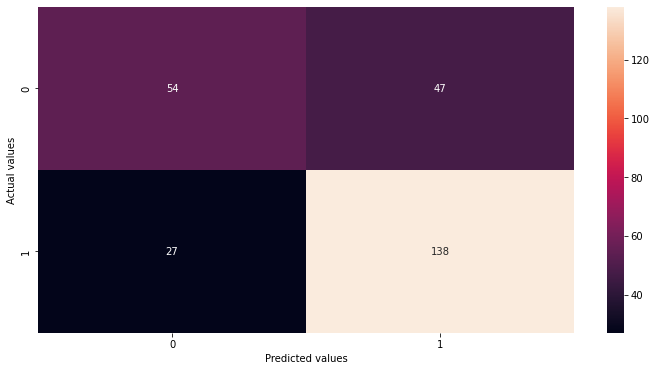

In [100]:
# Call the function to plot heatmap for the confusion matrix for the testing data

plot_c_matrix(y_test, test_pred)

**Interpretation**
- From the target testing data (y_test, class 1), out of the total 165 NBA players that will last 5 years or more, 138 NBA 
players were correctly predicted (True Positive), while the remaining 27 NBA players were wrongly predicted that they will
not last 5 years (False Negative) but they will last 5 years or more.
- From the target testing data (y_test, class 0), out of the total 101 NBA players that will not last 5 years, 54 NBA players
were correctly predicted that they will not last 5 years (True Negative), while the remaining 47 NBA players were wrongly
predicted that they will last 5 years or more (True negative) but they will not last 5 years.


# Gaussian Naive Bayes...

In [39]:
# library to help build the model

from sklearn.naive_bayes import GaussianNB


In [ ]:
# To create an instant of Gaussian naive bayes

gNB = GaussianNB()

# To build the model

gNB.fit(x_train_scaler, y_train)

# To check the training performance of Gaussian Naive Bayes

In [42]:
# To check the training performance

gNB_train, y_pred1 = model_performance_regression(gNB, x_train_scaler, y_train)

gNB_train

,Accuracy,Recall,Precision,F1-score
0,0.629944,0.518968,0.818182,0.635097


**Interpretation**

- 51.8% of recall score means that from the data, the model predicted 52% correctly that NBA player will last 5 years or more.

- 81.8% of precision score means that, from the prediction, the model predicted 81.8% correctly that the NBA players will last 5 years or more.

# When compared with logistic regression model training performance

- This model shows significant improvement of 83% precision score in the training data from 74% of the logistic regression model
- The accuracy score, recall score and F1 score reduced to 63%, 52% and 64% from 71%, 84% and 78% respectively.

# To check the testing performance of Gaussian Naive Bayes

In [43]:
# To check the testing performance

gNB_test, y_pred2 = model_performance_regression(gNB, x_test_scaler, y_test)

gNB_test

,Accuracy,Recall,Precision,F1-score
0,0.609023,0.466667,0.827957,0.596899


**Interpretation**

- 47% of the recall score means that, from the true data, the gaussuan naive bayes model predicted 47% correctly that NBA players will last 5 years or more.
- 83% of the precision score means that, from the prediction, the model correctly predicted 83% of the players will last 5 years or more

# When compared with logistic regression model testing performance

- The precision score increased to 83%
- Other metrics reduced significantly; accuracy score to 61% from 72%, recall score to 47% from 84% and F1 score to 60% from 79%.

# Neural Network

In [44]:
# from the library, import the neural network algorithm

from sklearn.neural_network import MLPClassifier

In [46]:
# To instantiate the neural netwoek

mlpc = MLPClassifier()

# To build the model

mlpc.fit(x_train_scaler, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

# To check the training performance of Neural Network

In [47]:
# To check the training performance

mlpc_train, mlpc_y_pred = model_performance_regression(mlpc, x_train_scaler, y_train)

mlpc_train

,Accuracy,Recall,Precision,F1-score
0,0.725989,0.830046,0.753444,0.789892


**Interpretation**

- Recall score - the model 83% correctly predicted from the true data that NBA player will last 5 years or more
- Precision Score- in the prediction, the model 75% correctly predicted that NBA player will last 5 years or more.
- Accuracy score of 73% means that the model accurately predicted that NBA player will last 5 years or more
- F1 score shows 79% correct prediction that NBA player will last 5 years or more.

# When compared with logistic regression model training performance

- The accuracy score increased to 73% from 71%
- The recall score reduced to 83% from 84%
- The precision score increased to 75% from 74%
- And the F1 score increased to 79% from 78%

# conclusion
- There is a slight increase in accuracy, precision and F1 scores but slight reduction in recall score when compared to
logistic training model.

# To check the testing performance of Neural Network

In [51]:
# To check the testing performance

mlpc_test, mlpc_y_pred2 = model_performance_regression(mlpc, x_test_scaler, y_test)

mlpc_test

,Accuracy,Recall,Precision,F1-score
0,0.721805,0.836364,0.745946,0.788571


**Interpretation**

- 84% recall score means, from the data, the model predicted 84% correctly that NBA player will last 5 years or more.
- 75% precision means that, in the prediction, the model was able to predict 75% correctly that NBA player will last 5 
years or more.
- 72% accuracy score shows that the model predicted 72% accurately that NBA player will last 5 years or more.

# When compared with logistic regression model testing performance

- The neural network model and logistic regression model for testing performance share the same behaviour.
That is, the same performance for accuracy score, recall score, precision score and F1 score.

# To improve the logistic regression model


In [283]:
# To check the proportion of the data in the target (TARGET_5Yrs)

y_train.value_counts(normalize=True)

1    0.620527
0    0.379473
Name: TARGET_5Yrs, dtype: float64

**Recommendation**

- Since the classes in the target variable (TARGET_5Yrs) are inbalanced, more weight can be given to the class 1 (player that will last 5 years and more) which is the area of ineterest, by using the "class_weight" argument/parameter to improve the model. That is;

1. Increase the percentage of the players that will last 5 years or more to 70% in both training and testing data - class 1,     0.7 (70%)
2. Reduce the percentage of the players that will not last 5 years in both training and testing data to 30% -  class 0,     0.3 (30%)


In [52]:
# create another instant of logistic regression

logregA = LogisticRegression(class_weight ={0:0.3, 1:0.7})

# To build a new model

logregA.fit(x_train_scaler, y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

# To check the training performance of the improved logistic regression model

In [53]:
# To check the training performance

df_train2, y_pred3 = model_performance_regression(logregA, x_train_scaler, y_train)

df_train2

,Accuracy,Recall,Precision,F1-score
0,0.643126,0.974203,0.639442,0.772099


**Interpretation**

- The recall score of 97% means that, out of the true target data,the model was able to predict 97% correctly that NBA players will last 5 years or more.
- The precision score of 64% means that, in the prediction, the model was able to predict 64% correctly that NBA players will last 5 years or more.

# Conclusion

- The recall score improved significantly to 97% by this model
- Both accuracy and precision scores reduced to 64% each and F1 score to 77%

# To check the testing performance of the improved regression model

In [56]:
# To check the testing performance

df_test2, test_pred2 =model_performance_regression(logregA, x_test_scaler, y_test)

df_test2

,Accuracy,Recall,Precision,F1-score
0,0.654135,0.981818,0.645418,0.778846


**Interpretation**

- The recall score of 98% means that, from the true target, the model predicted 98% correctly that NBA players will last 5 years or more
- The precision score of 65% means that the model was able to predict 65% correctly that NBA players will last 5 years or more.

# Conclusion

- The recall score increased to 98% as a result of this model improvement
- The accuracy and precision scores increased to 65% and F1 score to 78% each when compared to the training data using this imporved model